In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadamanda","key":"eafd1b3af85f087b31da98e2cf8a1c02"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [6]:
! kaggle datasets download smaranjitghose/corn-or-maize-leaf-disease-dataset

 97% 156M/161M [00:01<00:00, 75.3MB/s]
100% 161M/161M [00:01<00:00, 89.6MB/s]


In [7]:
! kaggle datasets download gutierrezsoares/rice-leafs-500px

100% 254M/255M [00:02<00:00, 122MB/s]
100% 255M/255M [00:02<00:00, 128MB/s]


In [ ]:
#! kaggle competitions download <name-of-competition>

In [8]:
! mkdir data

In [ ]:
! unzip rice-leafs-500px.zip -d data

In [ ]:
! unzip corn-or-maize-leaf-disease-dataset.zip -d data

In [11]:
import os
import tensorflow as tf
from tensorflow import keras

In [12]:
import os, shutil
def repath(pathfrom, moveto):
  os.mkdir(moveto)
  files = os.listdir(pathfrom)
  #files.sort()
  for f in files:
      src = pathfrom+f
      dst = moveto+f
      shutil.move(src,dst)
  
  #return "success"

# Corn
blight_dir = "./data/data/Blight/"
blight_dir_to = "./data/Blight_corn/"

common_rust_dir = "./data/data/Common_Rust/"
common_rust_dir_to = "./data/Common_Rust_corn/"

Gray_Leaf_Spot_dir = "./data/data/Gray_Leaf_Spot/"
Gray_Leaf_Spot_dir_to = "./data/Gray_Leaf_Spot_corn/"

Healthy_C_dir = "./data/data/Healthy/"
Healthy_C_dir_to = "./data/Healthy_C_corn/"

repath(blight_dir, blight_dir_to)
repath(common_rust_dir, common_rust_dir_to)
repath(Gray_Leaf_Spot_dir, Gray_Leaf_Spot_dir_to)
repath(Healthy_C_dir, Healthy_C_dir_to)

# Rice
BrownSpot_dir = "./data/train/BrownSpot/"
BrownSpot_dir_to = "./data/BrownSpot_rice/"

Healthy_dir = "./data/train/Healthy/"
Healthy_dir_to = "./data/Healthy_rice/"

Hispa_dir = "./data/train/Hispa/"
Hispa_dir_to = "./data/Hispa_rice/"

LeafBlast_dir = "./data/train/LeafBlast/"
LeafBlast_dir_to = "./data/LeafBlast_rice/"

repath(BrownSpot_dir, BrownSpot_dir_to)
repath(Healthy_dir, Healthy_dir_to)
repath(Hispa_dir, Hispa_dir_to)
repath(LeafBlast_dir, LeafBlast_dir_to)

os.mkdir("./validation/")

BrownSpot_dir = "./data/validation/BrownSpot/"
BrownSpot_dir_to = "./validation/BrownSpot_rice/"

Healthy_dir = "./data/validation/Healthy/"
Healthy_dir_to = "./validation/Healthy_rice/"

Hispa_dir = "./data/validation/Hispa/"
Hispa_dir_to = "./validation/Hispa_rice/"

LeafBlast_dir = "./data/validation/LeafBlast/"
LeafBlast_dir_to = "./validation/LeafBlast_rice/"

repath(BrownSpot_dir, BrownSpot_dir_to)
repath(Healthy_dir, Healthy_dir_to)
repath(Hispa_dir, Hispa_dir_to)
repath(LeafBlast_dir, LeafBlast_dir_to)

In [13]:
"""import os, shutil

os.mkdir("./validation/")
files = os.listdir("./data/validation/")
#files.sort()
for f in files:
    src = "./data/validation/"+f
    dst = "./validation/"+f
    shutil.move(src,dst)

pathfrom = "./data/validation" + "/"
files = os.listdir(pathfrom)
#files.sort()
for f in files:
    src = pathfrom+f
    os.rmdir(src)
os.rmdir("./data/validation")
"""

'import os, shutil\n\nos.mkdir("./validation/")\nfiles = os.listdir("./data/validation/")\n#files.sort()\nfor f in files:\n    src = "./data/validation/"+f\n    dst = "./validation/"+f\n    shutil.move(src,dst)\n\npathfrom = "./data/validation" + "/"\nfiles = os.listdir(pathfrom)\n#files.sort()\nfor f in files:\n    src = pathfrom+f\n    os.rmdir(src)\nos.rmdir("./data/validation")\n'

In [14]:
def delpath(path):
  #os.mkdir(moveto)
  pathfrom = path + "/"
  files = os.listdir(pathfrom)
  #files.sort()
  for f in files:
      src = pathfrom+f
      os.rmdir(src)
  os.rmdir(path)

delpath("./data/data")
delpath("./data/train")
delpath("./data/validation")

In [15]:
! pip install split-folders

In [16]:
import splitfolders  # atau import split_folders

os.mkdir("./data_fix/")
# Split dengan ratio.
# Untuk hanya membagi ke dalam set pelatihan dan validasi, setel tupel ke `rasio`, yaitu,` (.8, .2) `.
#splitfolders.ratio("input_folder", output="output_folder", seed=1337, ratio=(.8, .1, .1), group_prefix=None)
splitfolders.ratio("./data", output="./data_fix", seed=1337, ratio=(.8, .2), group_prefix=None)

# source: https://kotakode.com/pertanyaan/2025/Cara-menggunakan-shutil-move-untuk-memindahkan-sebuah-directory-di-Python

Copying files: 6872 files [00:02, 2746.92 files/s]


Sample blight image:


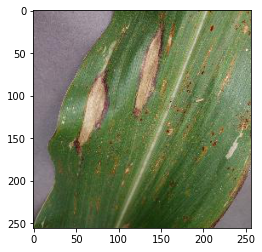


Sample brownspot_dir image:


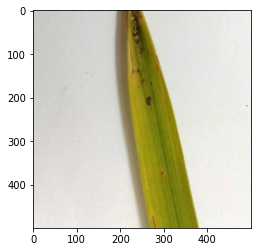


Sample healthy_dir image:


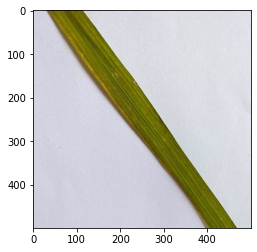

In [17]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

blight_dir = "./data_fix/train/Blight_corn"
brownspot_dir = "./data_fix/train/BrownSpot_rice"
healthy_dir = "./data_fix/val/Healthy_rice"

print("Sample blight image:")
plt.imshow(load_img(f"{os.path.join(blight_dir, os.listdir(blight_dir)[0])}"))
plt.show()

print("\nSample brownspot_dir image:")
plt.imshow(load_img(f"{os.path.join(brownspot_dir, os.listdir(brownspot_dir)[0])}"))
plt.show()

print("\nSample healthy_dir image:")
plt.imshow(load_img(f"{os.path.join(healthy_dir, os.listdir(healthy_dir)[0])}"))
plt.show()


In [18]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Load the first example of a happy face
sample_image_corn  = load_img(f"{os.path.join(blight_dir, os.listdir(blight_dir)[0])}")
#sample_image_corn = sample_image_corn.resize((150, 150))

# Convert the image into its numpy array representation
sample_array_corn = img_to_array(sample_image_corn)

# Load the first example of a happy face
sample_image_rice  = load_img(f"{os.path.join(brownspot_dir, os.listdir(brownspot_dir)[0])}")
#sample_image_rice = sample_image_rice.resize((150, 150))

# Convert the image into its numpy array representation
sample_array_rice = img_to_array(sample_image_rice)

# Load the first example of a happy face
sample_image_valid  = load_img(f"{os.path.join(healthy_dir, os.listdir(healthy_dir)[0])}")
#sample_image_valid = sample_image_rice.resize((150, 150))

# Convert the image into its numpy array representation
sample_array_valid = img_to_array(sample_image_valid)

print(f"Each image corn has shape: {sample_array_corn.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array_corn)}")

print(f"Each image rice has shape: {sample_array_rice.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array_rice)}")

print(f"Each image rice has shape: {sample_array_valid.shape}")

print(f"The maximum pixel value used is: {np.max(sample_image_valid)}")

Each image corn has shape: (256, 256, 3)
The maximum pixel value used is: 255.0
Each image rice has shape: (500, 500, 3)
The maximum pixel value used is: 255.0
Each image rice has shape: (500, 500, 3)
The maximum pixel value used is: 255


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
    ### START CODE HERE

    """training_images = np.expand_dims(training_images, -1)
    validation_images = np.expand_dims(validation_images, -1)"""
    # Instantiate the ImageDataGenerator class.
    # Remember to set the rescale argument.
    train_datagen = ImageDataGenerator(rescale=1/255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory="./data_fix/train",
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode="categorical")
    #train_generator.resize((150, 150))
    ### END CODE HERE
    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(rescale=1/255)

    # Pass in the appropriate arguments to the flow method
    validation_generator = validation_datagen.flow_from_directory(directory="./data_fix/val",
                                                                  target_size=(150, 150),
                                                                  batch_size=10,
                                                                  class_mode="categorical")
    #validation_generator.resize((150, 150)) 
    return train_generator, validation_generator
  
train_generator, validation_generator = image_generator()


Found 5493 images belonging to 8 classes.
Found 1379 images belonging to 8 classes.


In [ ]:
tf.reshape(train_generator, [-1])
tf.reshape(validation_generator, [-1])

In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [23]:
from tensorflow.keras import optimizers, losses

# GRADED FUNCTION: train_happy_sad_model
def create_model():

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model, you can toy around with the architecture.
    # Some helpful tips in case you are stuck:
    
    # - A good first layer would be a Conv2D layer with an input shape that matches 
    #   that of every image in the training set (including the color dimension)

    # - The model will work best with 3 convolutional layers

    # - There should be a Flatten layer in between convolutional and dense layers

    # - The final layer should be a Dense layer with the number of units 
    #   and activation function that supports binary classification.

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    #     # The fourth convolution (You can uncomment the 4th and 5th conv layers later to see the effect)
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
  #     # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(8, activation='softmax')
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    
    ### END CODE HERE
    return model

In [ ]:
from tensorflow.keras import optimizers, losses

# GRADED FUNCTION: train_happy_sad_model
def create_model():

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model, you can toy around with the architecture.
    # Some helpful tips in case you are stuck:
    
    # - A good first layer would be a Conv2D layer with an input shape that matches 
    #   that of every image in the training set (including the color dimension)

    # - The model will work best with 3 convolutional layers

    # - There should be a Flatten layer in between convolutional and dense layers

    # - The final layer should be a Dense layer with the number of units 
    #   and activation function that supports binary classification.

    model = tf.keras.models.Sequential([
        #tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150, 150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
        tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    #     tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
    #     tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
        tf.keras.layers.Conv2D(1024,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024,activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512,activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256,activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(4,activation = 'softmax')
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    
    ### END CODE HERE
    return model

In [24]:
# Save your model
model = create_model()

callbacks = myCallback()

# Train your model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[callbacks]
                    )

Epoch 1/20
550/550 [==============================] - 185s 334ms/step - loss: 1.1309 - accuracy: 0.5729 - val_loss: 0.7703 - val_accuracy: 0.6911
Epoch 2/20
550/550 [==============================] - 176s 320ms/step - loss: 0.8170 - accuracy: 0.6699 - val_loss: 0.7716 - val_accuracy: 0.7107
Epoch 3/20
550/550 [==============================] - 176s 319ms/step - loss: 0.7660 - accuracy: 0.6960 - val_loss: 0.7523 - val_accuracy: 0.7041
Epoch 4/20
550/550 [==============================] - 175s 318ms/step - loss: 0.7387 - accuracy: 0.7149 - val_loss: 0.7919 - val_accuracy: 0.7201
Epoch 5/20
550/550 [==============================] - 183s 333ms/step - loss: 0.7213 - accuracy: 0.7202 - val_loss: 0.7893 - val_accuracy: 0.7027
Epoch 6/20
550/550 [==============================] - 175s 319ms/step - loss: 0.7011 - accuracy: 0.7200 - val_loss: 1.1265 - val_accuracy: 0.6265
Epoch 7/20
550/550 [==============================] - 174s 317ms/step - loss: 0.7207 - accuracy: 0.7284 - val_loss: 0.7952 -

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./my_model.h5"

# YOUR CODE HERE
model.save(saved_model_path)